In [1]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import matplotlib.pyplot as plt
import seaborn as sns
import string
import regex as re
import numpy as np
from keras.models import load_model

In [2]:
df = pd.read_csv('train_preprocess.tsv', delimiter = '\t', header = None)
df.columns = ['tweet', 'sentiment']
df.head()

,tweet,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [3]:
def cleaning_tweet(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'\d+',' ', text)
    return text

In [4]:
df['clean_tweet'] = df['tweet'].apply(lambda x: cleaning_tweet(x))

In [5]:
df['sentiment'].value_counts()

positive    6416
negative    3436
neutral     1148
Name: sentiment, dtype: int64

In [6]:
df

,tweet,sentiment,clean_tweet
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k mmbri hujjah partai a...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih...
...,...,...,...
10995,tidak kecewa,positive,tidak kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati partaipartai yang telah berkoalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi di tol pasteur sudah macet parah bi...


In [7]:
positif = df[df['sentiment']=='positive']
netral = df[df['sentiment']=='neutral']
negatif = df[df['sentiment']=='negative']

neu = netral.sample(negatif.shape[0], replace = True)

df = pd.concat([positif, neu, negatif])

In [9]:
neg = df.loc[df['sentiment'] == 'negative'].clean_tweet.tolist()
neu = df.loc[df['sentiment'] == 'neutral'].clean_tweet.tolist()
pos = df.loc[df['sentiment'] == 'positive'].clean_tweet.tolist()

neg_sentiment = df.loc[df['sentiment'] == 'negative'].sentiment.tolist()
neu_sentiment = df.loc[df['sentiment'] == 'neutral'].sentiment.tolist()
pos_sentiment = df.loc[df['sentiment'] == 'positive'].sentiment.tolist()

In [10]:
total_data = pos + neu + neg
labels = pos_sentiment + neu_sentiment + neg_sentiment

In [11]:
df['sentiment'].value_counts()

positive    6416
neutral     3436
negative    3436
Name: sentiment, dtype: int64

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
X = total_data
y = labels

In [15]:
print("\nBefore tokenizing :\n{}".format(X[18]))


Before tokenizing :
makanan tradisional yang selalu rasanya stabil iga garang asam nya dan java steak nya jangan lupa ya dicoba hidangan penutup semua kue enak lemper soes fla gulung  enak sekali tidak ada yang tidak enak kalau makanan di sini 


In [16]:
max_features = 100000
tokenizer = Tokenizer(num_words = max_features, split=' ', lower=True)
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)


print("\nAfter tokenizing :\n{}".format(X[18]))


After tokenizing :
[9, 385, 2, 98, 37, 3650, 576, 1815, 828, 1, 4, 1272, 92, 1, 129, 314, 60, 194, 355, 681, 96, 347, 12, 10063, 10064, 10065, 7685, 12, 44, 6, 16, 2, 6, 12, 30, 9, 3, 20]


In [17]:
X = pad_sequences(X)

print("\nAfter padding :\n{}".format(X[18]))
print("\nAfter padding :\n{}".format(X[19]))


After padding :
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     9
   385     2    98    37  3650   576  1815   828     1     4  1272    92
     1   129   314    60   194   355   681    96   347    12 10063 10064
 10065  7685    12    44     6    16     2     6    12    30     9     3
    20]

After padding :
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   71   63    8    5   34  167    8   75    2 1291    3   67   21  845
    7  167  183    2    5  158  149  214  591    1   76   37    3  320
    4  167    1   14    6 1739  855    1  975  164   10    2  179  158
  149]


In [18]:
y = pd.get_dummies(y)
y = y.values

In [19]:
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (10630, 85)
y_train (10630, 3)
X_test (2658, 85)
y_test (2658, 3)


In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [23]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]
    
    # Create model architecture

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.5))
    model.add(Dense(3,activation='softmax'))
    # model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

    adam = optimizers.Adam(learning_rate = 0.0005)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    history = model.fit(data_train, target_train, epochs=50, batch_size=32, 
                        validation_data=(data_test, target_test), verbose=1, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    # for the current fold only
    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds

average_accuracy = np.mean(accuracies)


Epoch 1/50


333/333 [==============================] - 66s 175ms/step - loss: 0.6595 - accuracy: 0.7161 - val_loss: 0.4482 - val_accuracy: 0.8160
Epoch 2/50
333/333 [==============================] - 56s 168ms/step - loss: 0.3048 - accuracy: 0.8880 - val_loss: 0.3110 - val_accuracy: 0.8894
Epoch 3/50
333/333 [==============================] - 57s 170ms/step - loss: 0.1790 - accuracy: 0.9389 - val_loss: 0.2557 - val_accuracy: 0.9071
Epoch 4/50
333/333 [==============================] - 57s 171ms/step - loss: 0.1254 - accuracy: 0.9569 - val_loss: 0.2524 - val_accuracy: 0.9108
Epoch 5/50
333/333 [==============================] - 57s 171ms/step - loss: 0.0904 - accuracy: 0.9682 - val_loss: 0.2786 - val_accuracy: 0.9011
Epoch 6/50
333/333 [==============================] - 57s 171ms/step - loss: 0.0712 - accuracy: 0.9731 - val_loss: 0.2983 - val_accuracy: 0.9044
Epoch 6: early stopping
84/84 [==============================] - 3s 23ms/step
Training ke- 1
              precision    recall 

In [24]:
print(average_accuracy)

0.9657637321294207


In [25]:
model.save('LSTM.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


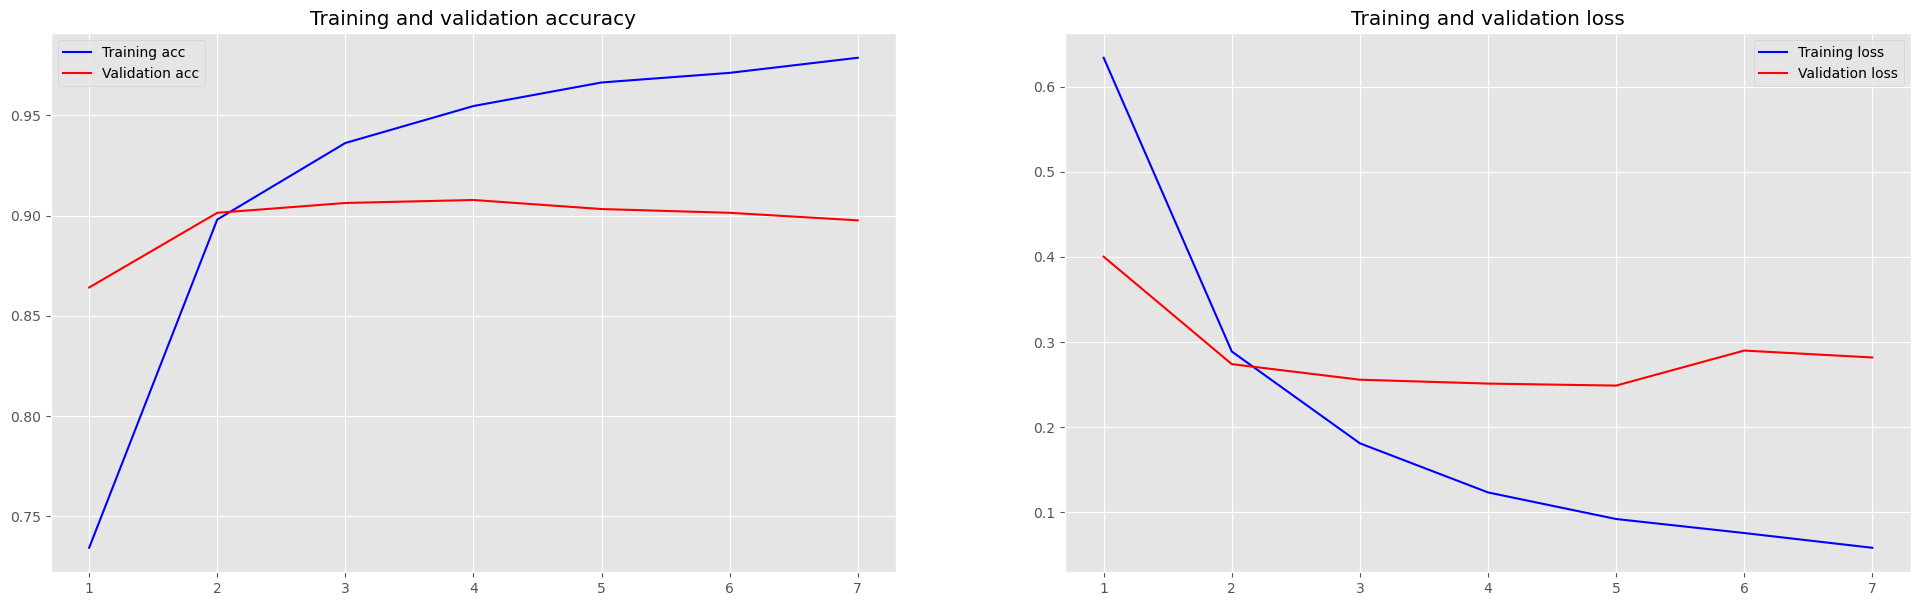

In [27]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(24, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)